## SWIS DATA ANALYSIS

In [1]:
import sys
sys.path.insert(0, '../')

import pandas as pd
import swis_data_info
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

<img src="../images/WA.png">

In [2]:
swis_pc = swis_data_info.SWIS_postcodes

In [3]:
len(swis_pc)

142

In [4]:
swis_sites = swis_data_info.SWIS_site

In [5]:
len(swis_sites)

659

Read the data with time series information

In [6]:
data = pd.read_csv("../../all_ts_data/all_sites/data-statistics.csv", index_col = "site_index")

In [7]:
len(data)

737

Extract the time series for the SWIS

In [8]:
site_ids_int = list(map(int, swis_sites))

In [9]:
swis_site_info = data.loc[data['site_id'].isin(site_ids_int)]

In [10]:
swis_site_info.head()

,site_id,Data Start,Date End,ts Length,Number of large gaps >=5hrs,Number of small gaps <5hrs,Gap Start Dates,Looks faulty (0 or 1 ),Curtailment \n(0 or 1),Notes
site_index,,,,,,,,,,
0,1948717897,2020-02-12 20:05:00+08:00,2021-03-10 16:00:00+08:00,112848,0,0,[],0,1,NaN
1,315046204,2020-11-09 00:00:00+08:00,2021-03-10 19:00:00+08:00,35077,1,1,"['2020-11-15 22:10:00+08:00', '2020-11-16 00:0...",0,0,NaN
2,1113196323,2020-02-12 20:05:00+08:00,2021-03-10 17:00:00+08:00,112860,0,0,[],0,1,NaN
3,838391054,2020-10-15 12:00:00+08:00,2021-03-10 19:00:00+08:00,42133,0,4,"['2020-10-15 13:30:00+08:00', '2020-10-15 19:4...",0,1,NaN
4,54265949,2020-02-12 20:05:00+08:00,2021-03-10 17:00:00+08:00,112860,0,0,[],1,1,* faulty - 0 values in between


In [11]:
len(swis_site_info)

659

We have 659 sites - Let's see the sites we can use. What are the conditions to use.

1) Faulty should be 0 - meaning the time series is not faulty

2) For now let's also take time series without large gap - so large gaps should be 0

3) We will also check whether time series has a length of at least 100,000

In [12]:
condition1 = swis_site_info.loc[swis_site_info['Looks faulty (0 or 1 )'] == 0]

In [13]:
len(condition1)

483

In [14]:
condition1.head()

,site_id,Data Start,Date End,ts Length,Number of large gaps >=5hrs,Number of small gaps <5hrs,Gap Start Dates,Looks faulty (0 or 1 ),Curtailment \n(0 or 1),Notes
site_index,,,,,,,,,,
0,1948717897,2020-02-12 20:05:00+08:00,2021-03-10 16:00:00+08:00,112848,0,0,[],0,1,NaN
1,315046204,2020-11-09 00:00:00+08:00,2021-03-10 19:00:00+08:00,35077,1,1,"['2020-11-15 22:10:00+08:00', '2020-11-16 00:0...",0,0,NaN
2,1113196323,2020-02-12 20:05:00+08:00,2021-03-10 17:00:00+08:00,112860,0,0,[],0,1,NaN
3,838391054,2020-10-15 12:00:00+08:00,2021-03-10 19:00:00+08:00,42133,0,4,"['2020-10-15 13:30:00+08:00', '2020-10-15 19:4...",0,1,NaN
7,1824904740,2020-10-26 14:15:00+08:00,2021-03-10 19:00:00+08:00,38938,0,2,"['2020-10-26 17:05:00+08:00', '2020-11-08 23:2...",0,1,NaN


There are 483 time series that are not faulty. Now let's check from those which time series don't have large gaps

In [15]:
condition2 = condition1.loc[condition1['Number of large gaps >=5hrs'] == 0]

In [16]:
condition2.head()

,site_id,Data Start,Date End,ts Length,Number of large gaps >=5hrs,Number of small gaps <5hrs,Gap Start Dates,Looks faulty (0 or 1 ),Curtailment \n(0 or 1),Notes
site_index,,,,,,,,,,
0,1948717897,2020-02-12 20:05:00+08:00,2021-03-10 16:00:00+08:00,112848,0,0,[],0,1,NaN
2,1113196323,2020-02-12 20:05:00+08:00,2021-03-10 17:00:00+08:00,112860,0,0,[],0,1,NaN
3,838391054,2020-10-15 12:00:00+08:00,2021-03-10 19:00:00+08:00,42133,0,4,"['2020-10-15 13:30:00+08:00', '2020-10-15 19:4...",0,1,NaN
7,1824904740,2020-10-26 14:15:00+08:00,2021-03-10 19:00:00+08:00,38938,0,2,"['2020-10-26 17:05:00+08:00', '2020-11-08 23:2...",0,1,NaN
9,476839589,2020-06-25 18:20:00+08:00,2021-03-10 18:00:00+08:00,74301,0,0,[],0,1,NaN


In [17]:
len(condition2)

478

Now we have 478 time series which are not faulty and don't have large gaps in the data. Let's check their length now.

In [18]:
ts_swis = condition2.copy()

In [175]:
# fig = go.Figure(data=[go.Histogram(x=ts_swis['ts Length'])])
# fig.update_xaxes(title = 'Time series length')
# fig.update_yaxes(title = 'Number of time series')
# fig.show()

In [32]:
ts_length_info = pd.DataFrame(ts_swis.groupby(by = 'ts Length').size(), columns = ['Count']).reset_index()

In [33]:
ts_length_info.head()

,ts Length,Count
0,1703,1
1,1791,1
2,2321,1
3,2345,1
4,2483,1


In [34]:
len(ts_length_info)

241

In [35]:
ts_length_info.max()

ts Length    112884
Count            76
dtype: int64

In [36]:
ts_swis_final = ts_swis.loc[ts_swis['ts Length'] >=100000]

In [37]:
ts_swis_final.head()

,site_id,Data Start,Date End,ts Length,Number of large gaps >=5hrs,Number of small gaps <5hrs,Gap Start Dates,Looks faulty (0 or 1 ),Curtailment \n(0 or 1),Notes
site_index,,,,,,,,,,
0,1948717897,2020-02-12 20:05:00+08:00,2021-03-10 16:00:00+08:00,112848,0,0,[],0,1,NaN
2,1113196323,2020-02-12 20:05:00+08:00,2021-03-10 17:00:00+08:00,112860,0,0,[],0,1,NaN
12,1597760039,2020-02-12 20:05:00+08:00,2021-03-10 15:00:00+08:00,112836,0,0,[],0,0,* May 6th seems off
14,317532327,2020-02-12 20:05:00+08:00,2021-03-10 15:00:00+08:00,112836,0,0,[],0,1,* drop after the peak looks weird - straight s...
16,1295864320,2020-02-12 20:05:00+08:00,2021-03-10 17:00:00+08:00,112860,0,0,[],0,0,NaN


In [38]:
len(ts_swis_final)

262

In [41]:
ts_swis_final.to_csv('../swis_ts_data/all_sites.csv')

We have 262 time series. Now let's check how many postcodes these come from.

In [39]:
site_info = pd.read_csv("../../all_ts_data/all_sites/all_site_info.csv")

In [40]:
site_info.head()

,site_id,dc_capacity,postcode
0,1354298257,6490,6123
1,1272386136,10540,6728
2,1942910158,6600,6014
3,1706523333,33550,6104
4,1068121303,3990,6330


In [41]:
swis_final_sites = ts_swis_final['site_id'].values.tolist()

In [42]:
swis_final_site_info = site_info.loc[site_info['site_id'].isin(swis_final_sites)]

In [43]:
swis_final_pcs = pd.DataFrame(swis_final_site_info.groupby('postcode').size(), columns = ['number of sites'])

In [44]:
swis_final_pcs

,number of sites
postcode,
6000,1
6005,1
6006,2
6007,1
6008,1
...,...
6430,2
6432,2
6509,1


In [42]:
swis_final_pcs.to_csv('../swis_ts_data/pc_info.csv')

We have 108 postcodes in total for the final SWIS analysis

Points to discuss:

1) All the time series should be the same length

2) Chopping off the data 
    i) Removing morning and evening hours or just feeding that in as well
    ii) it is important for each day to have the same number of points (previously it was 14 - however, then in summer you will see the generation profile is not complete) 

In [45]:
swis_final_pcs.loc[swis_final_pcs['number of sites'] == swis_final_pcs.max().values[0]]

,number of sites
postcode,
6164,12


Postcode 6164 has the maximum number of sites

Let's aggregate the sites to postcode data and store them for analysis.

1) Let's first process all the sites for the same date range

2) Remove night time values - check how many points per day

3) Then get the sites for a give postcode

4) Now get the summation

In [46]:
swis_final_sites_str = list(map(str, swis_final_sites))

In [47]:
all_energy_data = pd.read_pickle('../../all_ts_data/all_sites/all_data.pickle')

In [48]:
swis_energy = all_energy_data[swis_final_sites_str]

We will consider the data that has at least a one year period from 2020-02-13 to 2021-03-09

In [49]:
swis_data_feb_march = swis_energy['2020-02-13': '2021-03-09']

Let's remove the sites that don't have this much of data

In [50]:
swis_data_feb_march

,1948717897,1113196323,1597760039,317532327,1295864320,2009066518,2040495184,1428227531,1004972352,559135936,...,283062553,136550807,1401696464,464928913,2008900735,2138682289,706649834,856690536,1960300017,1365742995
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-13 00:00:00+08:00,0.0,0.0,0.0,0.19,0.0,0.05,0.10,0.0,0.0,NaN,...,0.01,NaN,0.00,0.0,0.0,0.01,0.0,0.0,0.05,0.0
2020-02-13 00:05:00+08:00,0.0,0.0,0.0,0.27,0.0,0.06,0.09,0.0,0.0,NaN,...,0.01,NaN,0.00,0.0,0.0,0.02,0.0,0.0,0.05,0.0
2020-02-13 00:10:00+08:00,0.0,0.0,0.0,0.00,0.0,0.00,0.09,0.0,0.0,NaN,...,0.01,NaN,0.00,0.0,0.0,0.00,0.0,0.0,0.05,0.0
2020-02-13 00:15:00+08:00,0.0,0.0,0.0,0.18,0.0,0.05,0.09,0.0,0.0,NaN,...,0.01,NaN,0.00,0.0,0.0,0.01,0.0,0.0,0.05,0.0
2020-02-13 00:20:00+08:00,0.0,0.0,0.0,0.18,0.0,0.05,0.11,0.0,0.0,NaN,...,0.01,NaN,0.00,0.0,0.0,0.03,0.0,0.0,0.05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-09 23:35:00+08:00,0.0,0.0,0.0,0.01,0.0,0.00,0.11,0.0,0.0,0.07,...,0.09,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.11,0.0
2021-03-09 23:40:00+08:00,0.0,0.0,0.0,0.02,0.0,0.04,0.09,0.0,0.0,0.05,...,0.00,0.00,0.07,0.0,0.0,0.00,0.0,0.0,0.11,0.0
2021-03-09 23:45:00+08:00,0.0,0.0,0.0,0.00,0.0,0.07,0.08,0.0,0.0,0.05,...,0.01,0.01,0.29,0.0,0.0,0.00,0.0,0.0,0.11,0.0


In [51]:
swis_no_nans = swis_data_feb_march.loc[:, (swis_data_feb_march.isnull().sum(axis=0) ==0)]

In [52]:
swis_hourly = swis_no_nans.resample('1H').mean().round(2)

In [53]:
swis_hourly

,1948717897,1113196323,1597760039,317532327,1295864320,2009066518,2040495184,1428227531,1004972352,1262727446,...,2136815864,283062553,1401696464,464928913,2008900735,2138682289,706649834,856690536,1960300017,1365742995
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-13 00:00:00+08:00,0.00,0.00,0.00,0.13,0.00,0.05,0.13,0.00,0.00,0.02,...,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.05,0.00
2020-02-13 01:00:00+08:00,0.00,0.00,0.00,0.08,0.00,0.05,0.26,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.05,0.00
2020-02-13 02:00:00+08:00,0.00,0.00,0.00,0.11,0.00,0.05,0.11,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.05,0.00
2020-02-13 03:00:00+08:00,0.00,0.00,0.00,0.15,0.00,0.05,0.08,0.00,0.00,0.00,...,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.05,0.00
2020-02-13 04:00:00+08:00,0.01,0.00,0.00,0.15,0.00,0.05,0.08,0.00,0.00,0.00,...,0.00,0.08,0.00,0.00,0.00,0.01,0.00,0.00,0.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-09 19:00:00+08:00,143.91,188.49,73.52,1228.62,2896.96,154.83,130.15,75.11,152.57,120.29,...,217.36,247.34,235.98,295.67,172.67,590.28,205.69,154.21,1110.01,199.87
2021-03-09 20:00:00+08:00,75.06,49.94,13.34,260.24,562.90,39.53,35.80,16.12,29.38,36.13,...,54.38,55.75,99.69,72.91,41.37,210.20,85.65,92.19,330.74,34.48
2021-03-09 21:00:00+08:00,7.97,7.17,1.78,26.38,99.17,4.06,3.32,1.70,1.62,3.15,...,10.88,10.85,10.38,13.19,8.03,37.88,11.08,8.78,50.86,7.54


We have 241 sites to work with for the SWIS data

In [85]:
swis_hourly.to_csv('../swis_ts_data/swis_hourly.csv')

In [54]:
swis_hourly.to_pickle('../swis_ts_data/swis_hourly')

In [55]:
swis_hourly[swis_hourly.isnull().any(axis=1)]

,1948717897,1113196323,1597760039,317532327,1295864320,2009066518,2040495184,1428227531,1004972352,1262727446,...,2136815864,283062553,1401696464,464928913,2008900735,2138682289,706649834,856690536,1960300017,1365742995
timestamp,,,,,,,,,,,,,,,,,,,,,


Now we'll look at removing night time values

In [56]:
swis_hourly

,1948717897,1113196323,1597760039,317532327,1295864320,2009066518,2040495184,1428227531,1004972352,1262727446,...,2136815864,283062553,1401696464,464928913,2008900735,2138682289,706649834,856690536,1960300017,1365742995
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-13 00:00:00+08:00,0.00,0.00,0.00,0.13,0.00,0.05,0.13,0.00,0.00,0.02,...,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.05,0.00
2020-02-13 01:00:00+08:00,0.00,0.00,0.00,0.08,0.00,0.05,0.26,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.05,0.00
2020-02-13 02:00:00+08:00,0.00,0.00,0.00,0.11,0.00,0.05,0.11,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.05,0.00
2020-02-13 03:00:00+08:00,0.00,0.00,0.00,0.15,0.00,0.05,0.08,0.00,0.00,0.00,...,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.05,0.00
2020-02-13 04:00:00+08:00,0.01,0.00,0.00,0.15,0.00,0.05,0.08,0.00,0.00,0.00,...,0.00,0.08,0.00,0.00,0.00,0.01,0.00,0.00,0.05,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-09 19:00:00+08:00,143.91,188.49,73.52,1228.62,2896.96,154.83,130.15,75.11,152.57,120.29,...,217.36,247.34,235.98,295.67,172.67,590.28,205.69,154.21,1110.01,199.87
2021-03-09 20:00:00+08:00,75.06,49.94,13.34,260.24,562.90,39.53,35.80,16.12,29.38,36.13,...,54.38,55.75,99.69,72.91,41.37,210.20,85.65,92.19,330.74,34.48
2021-03-09 21:00:00+08:00,7.97,7.17,1.78,26.38,99.17,4.06,3.32,1.70,1.62,3.15,...,10.88,10.85,10.38,13.19,8.03,37.88,11.08,8.78,50.86,7.54


Now we will sum up and get the data for each postcode - we will have a total of 108 postcodes

In [57]:
site_info

,site_id,dc_capacity,postcode
0,1354298257,6490,6123
1,1272386136,10540,6728
2,1942910158,6600,6014
3,1706523333,33550,6104
4,1068121303,3990,6330
...,...,...,...
732,714450288,3000,6330
733,1130324455,6480,6030
734,1554599929,100800,6280
735,1707726251,11470,6503


In [58]:
swis_hourly_ids = map(int, swis_hourly.columns.tolist())

In [59]:
# Get the new SWIS site ids

site_info_swis_hourly = site_info.loc[site_info['site_id'].isin(swis_hourly_ids)]

In [60]:
site_info_swis_hourly_pcs = site_info_swis_hourly.groupby('postcode', as_index = False).agg({"site_id": "count"})

In [61]:
site_info_swis_hourly_pcs

,postcode,site_id
0,6000,1
1,6005,1
2,6006,2
3,6007,1
4,6008,1
...,...,...
96,6430,1
97,6432,2
98,6509,1
99,6528,1


Now get the site ids for each postcode

In [62]:
swis_hourly_pcs = site_info_swis_hourly_pcs['postcode'].values.tolist()

In [63]:
# swis_hourly_pcs

In [64]:
swis_hourly_pcs[2]

6006

In [65]:
# site_info_swis_hourly.loc[site_info_swis_hourly['postcode'] == swis_hourly_pcs[100]]['site_id'].tolist()

In [66]:
pc_site_info = {}

site_ids = []

for pc in swis_hourly_pcs:
    site_ids_in_pc = site_info_swis_hourly.loc[site_info_swis_hourly['postcode'] == pc]['site_id'].tolist()
    pc_site_info[str(pc)] = site_ids_in_pc
    site_ids.extend(site_ids_in_pc)

In [67]:
len(site_ids)

241

In [68]:
len(site_ids) == len(set(site_ids))

True

So we don't have duplicate site ids in multiple postcodes. There are 101 postcodes

In [69]:
len(pc_site_info.keys())

101

Now we will think about aggregating

In [70]:
pc_site_info['6000']

[648402560]

In [71]:
pc_generation = []

for each_pc in pc_site_info.keys():
    agg_generation = swis_hourly[map(str,pc_site_info[each_pc])].sum(axis=1)
    pc_generation.append(pd.DataFrame(agg_generation, columns = [each_pc]))

In [72]:
# Let's combine everything together

pc_generation_df = pd.concat(pc_generation, axis=1)

In [73]:
pc_generation_df

,6000,6005,6006,6007,6008,6009,6010,6011,6014,6015,...,6324,6330,6391,6401,6426,6430,6432,6509,6528,6530
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-13 00:00:00+08:00,1.88,0.05,0.04,0.00,0.19,0.69,0.55,0.42,0.00,0.02,...,0.00,1.54,0.00,0.03,0.00,0.00,1.45,0.00,0.18,0.81
2020-02-13 01:00:00+08:00,1.90,0.05,0.06,0.00,0.19,0.40,0.43,0.23,0.00,0.02,...,0.00,1.47,0.00,0.03,0.00,0.00,1.44,0.00,0.15,0.81
2020-02-13 02:00:00+08:00,1.80,0.05,0.05,0.00,0.18,0.46,0.30,0.20,0.00,0.02,...,0.00,1.51,0.00,0.03,0.00,0.00,1.49,0.00,0.15,0.75
2020-02-13 03:00:00+08:00,1.93,0.05,0.05,0.00,0.19,0.12,0.73,0.23,0.00,0.03,...,0.00,1.50,0.00,0.04,0.00,0.00,1.53,0.00,0.39,0.66
2020-02-13 04:00:00+08:00,1.80,0.05,0.06,0.00,0.19,0.07,0.71,0.24,0.00,0.02,...,0.00,1.50,0.00,0.03,0.00,0.00,1.53,0.00,0.28,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-09 19:00:00+08:00,228.90,1110.01,1961.36,69.64,2885.45,593.20,1141.54,996.10,1167.85,51.58,...,130.77,1294.81,214.64,939.93,106.90,514.46,3256.59,380.77,526.80,3842.54
2021-03-09 20:00:00+08:00,70.46,330.74,585.57,31.31,849.84,160.95,315.33,246.09,336.25,34.01,...,57.39,466.03,67.23,293.43,10.73,79.95,882.81,173.90,267.76,1722.07
2021-03-09 21:00:00+08:00,11.96,50.86,113.48,4.72,136.00,22.00,46.09,32.16,49.19,5.82,...,4.03,46.73,11.86,33.02,1.31,7.13,24.09,21.46,36.31,287.62


In [162]:
pc_generation_df.to_csv('../swis_ts_data/pc_generation_df.csv')

In [74]:
pc_generation_df.to_pickle('../swis_ts_data/pc_generation_df')

## Let's check the weather data in the _data folder 

In [139]:
from plotly.subplots import make_subplots

In [140]:
pc_index = '6324'

In [141]:
weather_df_cols = ['timestamp', 'temperature', 'humidity', 'dew_point', 'wind_speed', 'pressure', 'cloud_cover', 'uv_index']

In [142]:
weather_history = pd.read_csv(f'../../_data/weather/{pc_index}/{pc_index}_history.csv', usecols = weather_df_cols)

In [143]:
weather_history.head()

,timestamp,temperature,dew_point,humidity,wind_speed,cloud_cover,pressure,uv_index
0,2020-02-20 18:00:00+08:00,29.0,9.0,30.0,13.0,0.0,NaN,6.0
1,2020-02-20 19:00:00+08:00,29.0,9.0,30.0,13.0,0.0,NaN,6.0
2,2020-02-20 20:00:00+08:00,28.0,11.0,34.0,13.0,0.0,NaN,1.0
3,2020-02-20 21:00:00+08:00,25.0,12.0,43.0,11.0,0.0,NaN,0.0
4,2020-02-20 22:00:00+08:00,25.0,12.0,43.0,11.0,0.0,NaN,0.0


In [144]:
weather_fc= pd.read_csv(f'../../_data/weather/{pc_index}/{pc_index}_forecast.csv', usecols = weather_df_cols)

In [145]:
weather_fc.head()

,timestamp,temperature,dew_point,humidity,wind_speed,cloud_cover,pressure,uv_index
0,2020-02-21 17:00:00+08:00,32.0,8.0,23.0,14.0,56.0,1015.5,8.0
1,2020-02-21 18:00:00+08:00,32.0,8.0,23.0,14.0,56.0,1015.5,8.0
2,2020-02-21 19:00:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-21 20:00:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-21 21:00:00+08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
weather_irradiance= pd.read_csv(f'../../_data/weather/{pc_index}/{pc_index}_irradiance.csv')

In [147]:
weather_irradiance.head()

,timestamp,direct_normal,global_horizontal
0,2020-02-14 07:00:00+08:00,0.0,0.0
1,2020-02-14 07:15:00+08:00,0.0,0.0
2,2020-02-14 07:30:00+08:00,0.0,0.0
3,2020-02-14 07:45:00+08:00,0.0,0.0
4,2020-02-14 08:00:00+08:00,0.0,0.0


In [174]:
# count = 1

# fig = make_subplots(rows=9, cols=1)

# for weather_f in weather_df_cols[1:]:
#     fig.add_trace(go.Scatter(x= weather_history['timestamp'], y = weather_history[weather_f], name = weather_f),
#                  row = count, col=1)
#     fig.add_trace(go.Scatter(x= weather_fc['timestamp'], y = weather_fc[weather_f], name = f'{weather_f}_fc'),
#                  row = count, col=1)
#     count+=1
    
# fig.add_trace(go.Scatter(x= weather_irradiance['timestamp'], y = weather_irradiance['direct_normal'], 
#                          name = 'direct normal'),
#                  row = count, col=1)

# fig.add_trace(go.Scatter(x= weather_irradiance['timestamp'], y = weather_irradiance['global_horizontal'], 
#                          name = 'global horizontal'),
#                  row = count+1, col=1)

# fig.show()

All data in the weather folder seems to have gaps during May-Jul and Sep-Nov

Okay so now we have to use the weather data we extracted seperately from DarkSky - mapping postcodes to 30 locations


1) We will first read all the files and combine the data to one dataframe - We extracted data for 30 cluster centroids (each postcode will be mapped to one of these centroids)

In [149]:
import os

In [150]:
WEATHER_DATA_DIR = '../../darksky-weather/pc_data/'

weather_csv_files = os.listdir(WEATHER_DATA_DIR)

In [151]:
files_clusters = {}


for file in weather_csv_files:
    cluster_index = file.split("-")[0]
    if cluster_index not in files_clusters.keys():
        files_clusters[cluster_index] = [file]
    else:
        files_clusters[cluster_index].append(file)

In [152]:
def combine_files(cluster_index):
    cluster_files = files_clusters[cluster_index]
    all_data = []
    
    for fl in cluster_files:
        weather_day = pd.read_csv(f'{WEATHER_DATA_DIR}{fl}')
        weather_day['timestamp'] = [pd.Timestamp(x, unit='s', tz='Australia/Perth') for x in weather_day['timestamp']]
        all_data.append(weather_day)
    df = pd.concat(all_data, axis=0)
    df_weather_info = df[['timestamp', 'temperature', 'humidity', 'dewPoint', 'wind', 'pressure', 'cloudCover', 'uvIndex']]
    df_weather_info =  df_weather_info.sort_values(by ='timestamp')
    df_weather_info = df_weather_info.set_index('timestamp')
    print(df_weather_info.isnull().values.any())
    return df_weather_info 

In [153]:
cluster_weather = combine_files(str(0))

False


In [154]:
cluster_weather

,temperature,humidity,dewPoint,wind,pressure,cloudCover,uvIndex
timestamp,,,,,,,
2020-01-31 00:00:00+08:00,16.86,0.72,11.69,5.89,1011.1,0.01,0
2020-01-31 01:00:00+08:00,16.42,0.69,10.63,6.03,1011.1,0.01,0
2020-01-31 02:00:00+08:00,15.87,0.67,9.74,5.62,1011.3,0.01,0
2020-01-31 03:00:00+08:00,15.14,0.70,9.60,5.35,1011.9,0.00,0
2020-01-31 04:00:00+08:00,14.44,0.74,9.79,5.00,1012.2,0.00,0
...,...,...,...,...,...,...,...
2021-03-01 19:00:00+08:00,21.17,0.75,16.57,7.75,1008.6,1.00,0
2021-03-01 20:00:00+08:00,20.80,0.76,16.41,8.19,1009.1,1.00,0
2021-03-01 21:00:00+08:00,19.68,0.81,16.30,8.85,1009.7,0.99,0


In [155]:
import ast

In [156]:
# we will know which postcode belongs to which cluster
file = open("../swis_ts_data/cluster_mapping", "r")

contents = file.read()
CLUSTER_MAPPING = ast.literal_eval(contents)

file.close()

In [157]:
# CLUSTER_MAPPING

In [173]:
# let's plot and see whether our data is correct 


# pc_val = pc_generation_df.columns[1]
# cluster_pc = CLUSTER_MAPPING[pc_val]

# pc_weather = combine_files(str(cluster_pc))
# pc_generation = pc_generation_df[[pc_val]]

# fig_pc_weather = make_subplots(rows=8, cols=1, shared_xaxes=True)

# fig_pc_weather.add_trace(go.Scatter(x = pc_generation.index, y= pc_generation[pc_val], name ='solar power'),
#                          row=1, col=1)

# row_count =2
# for weather_features in pc_weather.columns:
#     fig_pc_weather.add_trace(go.Scatter(x = pc_weather.index, y= pc_weather[weather_features], name =weather_features),
#                          row=row_count, col=1)
#     row_count +=1

# fig_pc_weather.show()

Okay - now we will combine our data together as required for the DNN.

1) We'll first see how to chuck the data

In [298]:
from solartime import SolarTime
from pytz import timezone
from datetime import date

Let's plot one site to see the generation profile and the time zone

Get the postcodes of each site and the respective lat and lon - we can use the coordinate info in dark-sky for this. Then pass it to the Solar Time.

In [293]:
coordinates = pd.read_csv('../../darksky-weather/input_data/coordinates.csv', index_col = [0])

In [325]:
localtz = timezone('Australia/Perth')
sun = SolarTime()
longest_day = date(2021,2,21)


for cluster_indx in range(0, 30):
    lat_lon = coordinates.iloc[cluster_indx, :]
    schedule = sun.sun_utc(longest_day, lat_lon['lat'], lat_lon['lon'])
    sunset = schedule['sunset'].astimezone(localtz)
    sunrise = schedule['sunrise'].astimezone(localtz)
    print(sunrise, sunset)

2021-02-21 06:00:56+08:00 2021-02-21 19:00:44+08:00
2021-02-21 06:06:55+08:00 2021-02-21 18:45:58+08:00
2021-02-21 05:56:39+08:00 2021-02-21 19:01:06+08:00
2021-02-21 05:38:38+08:00 2021-02-21 18:36:44+08:00
2021-02-21 06:00:03+08:00 2021-02-21 19:00:27+08:00
2021-02-21 05:39:54+08:00 2021-02-21 18:12:15+08:00
2021-02-21 06:15:37+08:00 2021-02-21 19:02:07+08:00
2021-02-21 06:05:53+08:00 2021-02-21 19:01:00+08:00
2021-02-21 05:52:29+08:00 2021-02-21 18:36:09+08:00
2021-02-21 05:51:24+08:00 2021-02-21 18:52:46+08:00
2021-02-21 05:48:57+08:00 2021-02-21 18:55:51+08:00
2021-02-21 05:33:49+08:00 2021-02-21 18:38:29+08:00
2021-02-21 06:08:38+08:00 2021-02-21 18:59:51+08:00
2021-02-21 05:59:54+08:00 2021-02-21 19:04:49+08:00
2021-02-21 05:59:30+08:00 2021-02-21 19:01:18+08:00
2021-02-21 05:57:04+08:00 2021-02-21 18:57:08+08:00
2021-02-21 05:45:18+08:00 2021-02-21 18:44:28+08:00
2021-02-21 05:52:57+08:00 2021-02-21 18:55:49+08:00
2021-02-21 05:58:48+08:00 2021-02-21 19:02:42+08:00
2021-02-21 0

Let's chop data from 5am - 10pm 

In [75]:
pc_generation_df = pd.read_pickle('../swis_ts_data/pc_generation_df')

In [76]:
pc_generation_df.head()

,6000,6005,6006,6007,6008,6009,6010,6011,6014,6015,...,6324,6330,6391,6401,6426,6430,6432,6509,6528,6530
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-13 00:00:00+08:00,1.88,0.05,0.04,0.0,0.19,0.69,0.55,0.42,0.0,0.02,...,0.0,1.54,0.0,0.03,0.0,0.0,1.45,0.0,0.18,0.81
2020-02-13 01:00:00+08:00,1.90,0.05,0.06,0.0,0.19,0.40,0.43,0.23,0.0,0.02,...,0.0,1.47,0.0,0.03,0.0,0.0,1.44,0.0,0.15,0.81
2020-02-13 02:00:00+08:00,1.80,0.05,0.05,0.0,0.18,0.46,0.30,0.20,0.0,0.02,...,0.0,1.51,0.0,0.03,0.0,0.0,1.49,0.0,0.15,0.75
2020-02-13 03:00:00+08:00,1.93,0.05,0.05,0.0,0.19,0.12,0.73,0.23,0.0,0.03,...,0.0,1.50,0.0,0.04,0.0,0.0,1.53,0.0,0.39,0.66
2020-02-13 04:00:00+08:00,1.80,0.05,0.06,0.0,0.19,0.07,0.71,0.24,0.0,0.02,...,0.0,1.50,0.0,0.03,0.0,0.0,1.53,0.0,0.28,0.67


In [77]:
temp_df = pc_generation_df.reset_index()
solar_times = []

for val in temp_df['timestamp']:
    if val.hour >= 5 and val.hour <= 22:
        solar_times.append(True)
    else:
        solar_times.append(False)

In [78]:
temp_df['solar_time'] = solar_times
temp_df.head()

,timestamp,6000,6005,6006,6007,6008,6009,6010,6011,6014,...,6330,6391,6401,6426,6430,6432,6509,6528,6530,solar_time
0,2020-02-13 00:00:00+08:00,1.88,0.05,0.04,0.0,0.19,0.69,0.55,0.42,0.0,...,1.54,0.0,0.03,0.0,0.0,1.45,0.0,0.18,0.81,False
1,2020-02-13 01:00:00+08:00,1.90,0.05,0.06,0.0,0.19,0.40,0.43,0.23,0.0,...,1.47,0.0,0.03,0.0,0.0,1.44,0.0,0.15,0.81,False
2,2020-02-13 02:00:00+08:00,1.80,0.05,0.05,0.0,0.18,0.46,0.30,0.20,0.0,...,1.51,0.0,0.03,0.0,0.0,1.49,0.0,0.15,0.75,False
3,2020-02-13 03:00:00+08:00,1.93,0.05,0.05,0.0,0.19,0.12,0.73,0.23,0.0,...,1.50,0.0,0.04,0.0,0.0,1.53,0.0,0.39,0.66,False
4,2020-02-13 04:00:00+08:00,1.80,0.05,0.06,0.0,0.19,0.07,0.71,0.24,0.0,...,1.50,0.0,0.03,0.0,0.0,1.53,0.0,0.28,0.67,False


In [79]:
solar_df = temp_df.loc[temp_df['solar_time'] == True].set_index('timestamp')
solar_df = solar_df.drop(columns = ['solar_time'])

In [80]:
solar_df

,6000,6005,6006,6007,6008,6009,6010,6011,6014,6015,...,6324,6330,6391,6401,6426,6430,6432,6509,6528,6530
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-13 05:00:00+08:00,1.84,0.05,0.05,0.00,0.19,0.09,0.57,0.23,0.00,0.03,...,0.00,1.51,0.00,0.03,0.00,0.00,1.54,0.00,0.28,0.59
2020-02-13 06:00:00+08:00,1.89,0.05,0.06,0.00,0.19,0.05,0.56,0.22,0.00,0.02,...,0.00,1.50,0.00,0.03,0.00,0.00,1.52,0.00,0.27,0.64
2020-02-13 07:00:00+08:00,1.88,0.05,0.05,0.00,0.18,0.22,0.59,0.22,0.00,0.02,...,0.00,1.49,0.00,0.03,0.00,0.00,1.50,0.00,0.17,0.51
2020-02-13 08:00:00+08:00,1.89,0.05,0.23,0.00,0.21,0.16,0.30,0.19,0.00,0.02,...,0.27,5.51,0.05,0.04,0.03,11.18,33.24,0.10,0.25,0.61
2020-02-13 09:00:00+08:00,9.89,89.77,204.14,6.94,215.10,30.62,148.68,41.98,48.13,10.74,...,28.79,370.52,8.36,98.85,5.72,327.16,764.49,96.60,15.84,254.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-09 18:00:00+08:00,379.54,1645.54,3280.33,170.18,4270.21,940.11,1758.77,1405.68,1755.24,147.06,...,211.47,2763.77,304.58,1556.07,171.57,1168.15,5152.70,738.18,700.69,6891.65
2021-03-09 19:00:00+08:00,228.90,1110.01,1961.36,69.64,2885.45,593.20,1141.54,996.10,1167.85,51.58,...,130.77,1294.81,214.64,939.93,106.90,514.46,3256.59,380.77,526.80,3842.54
2021-03-09 20:00:00+08:00,70.46,330.74,585.57,31.31,849.84,160.95,315.33,246.09,336.25,34.01,...,57.39,466.03,67.23,293.43,10.73,79.95,882.81,173.90,267.76,1722.07


In [81]:
solar_df.groupby(solar_df.index.date).count()['6000'].values

array([18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

In [172]:
# Let's quickly plot and see the generation profile

# fig_solar = make_subplots(rows=3, cols=1, shared_xaxes=True)
# fig_solar.add_trace(go.Scatter(x=solar_df.index, y=solar_df['6006'], name ='6006'), row=1, col=1)
# fig_solar.add_trace(go.Scatter(x=solar_df.index, y=solar_df['6324'], name ='6324'), row=2, col=1)
# fig_solar.add_trace(go.Scatter(x=solar_df.index, y=solar_df['6430'], name ='6430'), row=3, col=1)

# fig_solar.show()

We will write a function for one postcode

In [85]:
def shift_solar_data(power_data):
    # day 1 will be the power value as the window generator chuncks that

    day2 = power_data.shift(18)
    day2.columns = ['day2']

    day3 = day2.shift(18)
    day3.columns = ['day3']

    day4 = day3.shift(18)
    day4.columns = ['day4']

    day5 = day4.shift(18)
    day5.columns = ['day5']

    day6 = day5.shift(18)
    day6.columns = ['day6']

    day7 = day6.shift(18)
    day7.columns = ['day7']

    fc_data = pd.concat([power_data, day2, day3, day4, day5, day6, day7], axis=1).dropna()
    return fc_data

In [86]:
def reset_index_and_timestamp(dataframe):
    new_dataframe = dataframe.reset_index()
    new_dataframe['date_str'] = [x.tz_localize(None) for x in new_dataframe['timestamp']]
    new_dataframe = new_dataframe.set_index('date_str')
    new_dataframe = new_dataframe.drop(columns=['timestamp'])
    return new_dataframe

In [87]:
def process_data_for_dnn(postcode):
    pc_data = solar_df[[postcode]].rename(columns = {postcode: 'power'}).round(2)
    pc_data = reset_index_and_timestamp(pc_data)
    pc_data = shift_solar_data(pc_data)
    
    cluster_pc = CLUSTER_MAPPING[postcode]
    pc_weather = combine_files(str(cluster_pc))
    pc_weather = reset_index_and_timestamp(pc_weather)
    pc_fc_weather = pc_weather.shift(-24).dropna()
    
    solar_and_weather = pd.concat([pc_data, pc_fc_weather], axis=1).dropna()
    return solar_and_weather

Let's run process_data_for_dnn for all the postcodes

In [402]:
STORE_PATH = "../swis_ts_data/ts_data"

In [176]:
# for pc_value in solar_df:
#     pc_data_store = process_data_for_dnn(str(pc_value))
#     pc_data_store.to_csv(f'{STORE_PATH}/{pc_value}.csv')

In [413]:
pc_data_store.index[-1]

Timestamp('2021-02-28 22:00:00')

Before that we will get the Grid data

In [414]:
grid_data = pd.DataFrame(solar_df.sum(axis=1), columns = ['power']).round(2)[:'2021-02-28 22:00:00']
grid_data = reset_index_and_timestamp(grid_data)

In [415]:
grid_data_to_store = shift_solar_data(grid_data)

In [416]:
grid_data_to_store.to_csv(f'{STORE_PATH}/grid.csv')

Okay now let's do a small plot again

In [171]:
# Let's quickly plot and see the generation profile

# fig_solar = make_subplots(rows=4, cols=1, shared_xaxes=True)

# fig_solar.add_trace(go.Scatter(x=grid_data.index, y=grid_data['power'], name ='Grid'), row=1, col=1)

# fig_solar.add_trace(go.Scatter(x=solar_df.index, y=solar_df['6006'], name ='6006'), row=2, col=1)
# fig_solar.add_trace(go.Scatter(x=solar_df.index, y=solar_df['6324'], name ='6324'), row=3, col=1)
# fig_solar.add_trace(go.Scatter(x=solar_df.index, y=solar_df['6430'], name ='6430'), row=4, col=1)



# fig_solar.show()

## Plot stored data

In [109]:
STORE_PATH = "../swis_ts_data/ts_data"

In [110]:
grid_data = pd.read_csv(f'{STORE_PATH}/grid.csv', index_col = 0)

In [117]:
pc_1 = pd.read_csv(f'{STORE_PATH}/6065.csv', index_col = 0)[['power']]
pc_2 = pd.read_csv(f'{STORE_PATH}/6163.csv', index_col = 0)[['power']]
pc_3 = pd.read_csv(f'{STORE_PATH}/6233.csv', index_col = 0)[['power']]


In [120]:
sum_df = pd.concat([pc_1, pc_2, pc_3], axis=1).sum(axis=1)

In [121]:
sum_df

date_str
2020-02-19 05:00:00       63.31
2020-02-19 06:00:00       62.51
2020-02-19 07:00:00       61.98
2020-02-19 08:00:00       61.88
2020-02-19 09:00:00     2322.90
                         ...   
2021-02-28 18:00:00    36520.77
2021-02-28 19:00:00    26454.82
2021-02-28 20:00:00    14058.03
2021-02-28 21:00:00     2804.64
2021-02-28 22:00:00       66.47
Length: 6768, dtype: float64

In [170]:
# # Let's quickly plot and see the generation profile

# fig_solar = go.Figure()

# fig_solar.add_trace(go.Scatter(x=grid_data.index, y=grid_data['power'], name ='Grid'))

# # fig_solar.add_trace(go.Scatter(x=pc_1.index, y=pc_1['power'], name ='6000'))
# # fig_solar.add_trace(go.Scatter(x=pc_2.index, y=pc_2['power'], name ='6324'))
# # fig_solar.add_trace(go.Scatter(x=pc_3.index, y=pc_3['power'], name ='6430'))
# fig_solar.add_trace(go.Scatter(x=sum_df.index, y=sum_df.values, name ='aggregate 3 main pc'))

# # fig_solar.add_trace(go.Scatter(x=pc_1.index, y=pc_1['power'], name ='6065'))
# # fig_solar.add_trace(go.Scatter(x=pc_2.index, y=pc_2['power'], name ='6163'))
# # fig_solar.add_trace(go.Scatter(x=pc_3.index, y=pc_3['power'], name ='6233'))


# fig_solar.show()

In [159]:
ALL_SWIS_TS = ['grid', 6000, 6005, 6006, 6007, 6008, 6009, 6010, 6011, 6014, 6015, 6017, 6018, 6019, 6020, 6021, 6023,
               6024,
               6025, 6026, 6027, 6028, 6029, 6030, 6035, 6036, 6038, 6041, 6050, 6053, 6054, 6055, 6056, 6058, 6059,
               6061, 6062, 6063, 6064, 6065,
               6066, 6069, 6073, 6084, 6090, 6101, 6102, 6103, 6104, 6105, 6107, 6108, 6109, 6110, 6111, 6112, 6123,
               6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6157, 6159, 6162, 6163, 6164, 6166, 6167, 6168,
               6170, 6171, 6173, 6208, 6210,
               6211, 6220, 6230, 6232, 6233, 6237, 6254, 6271, 6280, 6281, 6284, 6312, 6317, 6324, 6330, 6391, 6401,
               6426, 6430, 6432, 6509, 6528, 6530]


ALL_SWIS_TS_NEW = ['grid', 6000, 6005, 6006, 6007, 6008, 6009, 6010, 6011, 6014, 6015, 6017, 6018, 6019, 6020, 6021, 6023,
               6024,
               6025, 6026, 6027, 6028, 6029, 6030, 6035, 6036, 6038, 6041, 6050, 6053, 6054, 6055, 6056, 6058, 6059,
               6061, 6062, 6063, 6064,
               6066, 6069, 6073, 6084, 6090, 6101, 6102, 6103, 6104, 6105, 6107, 6108, 6109, 6110, 6111, 6112, 6123,
               6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6157, 6159, 6162,6164, 6166, 6167, 6168,
               6170, 6171, 6173, 6208, 6210,
               6211, 6220, 6230, 6232, 6237, 6254, 6271, 6280, 6281, 6284, 6312, 6317, 6324, 6330, 6391, 6401,
               6426, 6430, 6432, 6509, 6528, 6530]

In [108]:
for ts in ALL_SWIS_TS:
    if ts not in ALL_SWIS_TS_NEW:
        print(ts)

6065
6163
6233


In [160]:
data = []
for ts in ALL_SWIS_TS[1:]:
    ts_data = pd.read_csv(f'{STORE_PATH}/{ts}.csv', index_col = 0)['power']
    max_ts = ts_data.max()
    data.append(ts_data.max())
#     print(max_ts, ts)

In [33]:
past_data =[]
POSTCODES = [6010, 6014, 6011, 6280, 6281, 6284]
for ts in POSTCODES:
    ts_data = pd.read_csv(f'../ts_data/new/{ts}.csv', index_col = 0)['power']
    past_data.append(ts_data.max())

<AxesSubplot:ylabel='Count'>

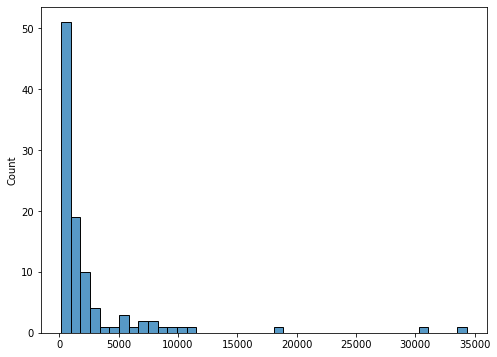

In [161]:
import seaborn as sns
sns.histplot(data=data)

<AxesSubplot:ylabel='Count'>

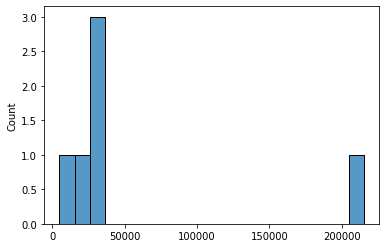

In [34]:
sns.histplot(data=past_data)

## Sort postcodes from South to North

In [119]:
import constants
import src.utils as utils

In [49]:
clusters = pd.read_csv('../swis_ts_data/cluster_pc.csv').rename(columns={'Unnamed: 0': 'pc'})
clusters = clusters.loc[clusters['pc'].isin(constants.SWIS_POSTCODES)]
cluster_numbers = clusters.groupby(by='cluster_num').count().index.tolist()

In [41]:
coordinate = pd.read_csv('../swis_ts_data/coordinates.csv')

In [52]:
south_to_north = coordinate.sort_values(by ='lat').rename(columns={'Unnamed: 0': 'cluster'})

In [56]:
cluster_sorted_list = south_to_north['cluster'].values.tolist()

In [67]:
pcs_sorted = []

for cluster_num in cluster_sorted_list:
    pcs = clusters.loc[clusters['cluster_num'] == cluster_num]['pc'].values.tolist()
    pcs_sorted.extend(pcs)

In [69]:
# pcs_sorted

## Plot Forecasts

In [162]:
fc_df = pd.read_csv('../swis_combined_nn_results/forecasts.csv', index_col = 0)

In [163]:
fc_df.head()

,naive_grid,naive_pc,arima_grid,arima_pc,conventional_lstm_grid,conventional_lstm_pc,conventional_cnn_grid,conventional_cnn_pc,conventional_tcn_grid,conventional_tcn_pc,SWIS_APPROACH_A_more_layer_without_norm_grid,SWIS_APPROACH_B_grid,pc_together_2D_conv_approach_grid,sequentional_training_approach_grid,pc_together_2D_conv_approach_with_simple_grid_cnn_grid
date_str,,,,,,,,,,,,,,,
2021-01-24 05:00:00,84.41,84.41,9395.222067,9125.743351,1963.603760,11599.872325,0.000000,1175.842801,19678.255859,7081.753365,6855.354004,0.000000,0.000000,0.000000,0.000000
2021-01-24 06:00:00,84.81,84.81,3627.552448,8461.844701,0.000000,2926.328790,18122.310547,1637.260271,9265.564453,4492.038598,0.000000,0.000000,0.000000,661.431885,8775.876953
2021-01-24 07:00:00,84.20,84.20,9688.170106,8226.682554,0.000000,658.582709,18787.697266,3411.695043,9013.908203,2358.673390,0.000000,2538.947510,375.119385,944.908447,3909.197510
2021-01-24 08:00:00,726.71,726.71,3477.972949,5695.919490,0.000000,2996.386062,4513.721191,10152.034114,10302.384766,5437.170207,8184.072754,7808.752441,22944.134766,1623.916260,12256.912109
2021-01-24 09:00:00,17963.81,17963.81,26588.974865,18518.544237,13709.646484,13073.581575,28988.095703,24160.490434,25644.419922,20920.027596,32800.164062,1962.611572,34004.500000,13514.427734,11526.658203


In [164]:
target_data = pd.read_csv(f'../swis_ts_data/ts_data/grid.csv', index_col=[0])[['power']]
_, test = utils.split_train_test_statmodels_swis(target_data)

In [165]:
import plotly.express as px

colors = px.colors.qualitative.Dark24

In [166]:
fig_fc = go.Figure()

fig_fc.add_trace(go.Scatter(x=test.index, y = test['power'], name='target generation', marker = dict(color ='black')))

count =0
for method in fc_df:
    fig_fc.add_trace(go.Scatter(x=fc_df.index, y = fc_df[method], name=method, marker = dict(color =colors[count])))
    count+=1
    
fig_fc.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
    
fig_fc.show()

In [167]:
fig_fc = go.Figure()

fig_fc.add_trace(go.Scatter(x=test.index, y = test['power'], name='target generation', marker = dict(color ='black')))

fig_fc.add_trace(go.Scatter(x=fc_df.index, y = fc_df['conventional_tcn_pc'], name='conventional_tcn_pc', marker = dict(color =colors[2])))
fig_fc.add_trace(go.Scatter(x=fc_df.index, y = fc_df['pc_together_2D_conv_approach_grid'], name='pc_together_2D_conv_approach', marker = dict(color =colors[1])))
fig_fc.add_trace(go.Scatter(x=fc_df.index, y = fc_df['sequentional_training_approach_grid'], name='conv+lstm sequentional approach', marker = dict(color =colors[3])))
fig_fc.add_trace(go.Scatter(x=fc_df.index, y = fc_df['pc_together_2D_conv_approach_with_simple_grid_cnn_grid'], name='pc 2d + grid 1D', marker = dict(color =colors[4])))



    
fig_fc.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
    
fig_fc.show()
# fig_fc.write_html('fc.html')

## Checking impact of certain postcodes

In [89]:
solar_df.to_pickle(f'../swis_ts_data/solar_df')

In [91]:
PC_to_remove = [6065, 6163, 6233]

In [90]:
solar_df

,6000,6005,6006,6007,6008,6009,6010,6011,6014,6015,...,6324,6330,6391,6401,6426,6430,6432,6509,6528,6530
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-13 05:00:00+08:00,1.84,0.05,0.05,0.00,0.19,0.09,0.57,0.23,0.00,0.03,...,0.00,1.51,0.00,0.03,0.00,0.00,1.54,0.00,0.28,0.59
2020-02-13 06:00:00+08:00,1.89,0.05,0.06,0.00,0.19,0.05,0.56,0.22,0.00,0.02,...,0.00,1.50,0.00,0.03,0.00,0.00,1.52,0.00,0.27,0.64
2020-02-13 07:00:00+08:00,1.88,0.05,0.05,0.00,0.18,0.22,0.59,0.22,0.00,0.02,...,0.00,1.49,0.00,0.03,0.00,0.00,1.50,0.00,0.17,0.51
2020-02-13 08:00:00+08:00,1.89,0.05,0.23,0.00,0.21,0.16,0.30,0.19,0.00,0.02,...,0.27,5.51,0.05,0.04,0.03,11.18,33.24,0.10,0.25,0.61
2020-02-13 09:00:00+08:00,9.89,89.77,204.14,6.94,215.10,30.62,148.68,41.98,48.13,10.74,...,28.79,370.52,8.36,98.85,5.72,327.16,764.49,96.60,15.84,254.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-09 18:00:00+08:00,379.54,1645.54,3280.33,170.18,4270.21,940.11,1758.77,1405.68,1755.24,147.06,...,211.47,2763.77,304.58,1556.07,171.57,1168.15,5152.70,738.18,700.69,6891.65
2021-03-09 19:00:00+08:00,228.90,1110.01,1961.36,69.64,2885.45,593.20,1141.54,996.10,1167.85,51.58,...,130.77,1294.81,214.64,939.93,106.90,514.46,3256.59,380.77,526.80,3842.54
2021-03-09 20:00:00+08:00,70.46,330.74,585.57,31.31,849.84,160.95,315.33,246.09,336.25,34.01,...,57.39,466.03,67.23,293.43,10.73,79.95,882.81,173.90,267.76,1722.07


Let's remove the dominating postcodes

In [101]:
new_solar_vals = solar_df[map(str, ALL_SWIS_TS_NEW[1:])]

In [102]:
grid_data_new = pd.DataFrame(new_solar_vals.sum(axis=1), columns = ['power']).round(2)[:'2021-02-28 22:00:00']
grid_data_new = reset_index_and_timestamp(grid_data_new)

In [112]:
grid_data_new

,power
date_str,
2020-02-13 05:00:00,17.77
2020-02-13 06:00:00,17.37
2020-02-13 07:00:00,17.78
2020-02-13 08:00:00,68.20
2020-02-13 09:00:00,7056.91
...,...
2021-02-28 18:00:00,96878.93
2021-02-28 19:00:00,64712.68
2021-02-28 20:00:00,27618.87


In [113]:
grid_newdata_to_store = shift_solar_data(grid_data_new)

In [114]:
grid_newdata_to_store

,power,day2,day3,day4,day5,day6,day7
date_str,,,,,,,
2020-02-19 05:00:00,19.32,16.53,15.86,16.33,18.62,20.06,17.77
2020-02-19 06:00:00,19.39,17.11,16.05,16.31,19.07,18.75,17.37
2020-02-19 07:00:00,18.15,16.43,15.82,16.21,17.95,17.88,17.78
2020-02-19 08:00:00,31.93,53.71,42.61,47.25,49.27,36.13,68.20
2020-02-19 09:00:00,5991.43,8789.10,6643.65,6589.21,4848.31,6039.19,7056.91
...,...,...,...,...,...,...,...
2021-02-28 18:00:00,96878.93,120266.78,127260.35,131632.41,132723.04,134531.63,131123.60
2021-02-28 19:00:00,64712.68,80917.06,87581.55,91535.40,93073.26,94459.99,93134.88
2021-02-28 20:00:00,27618.87,30429.19,40126.43,44110.21,43855.19,45849.63,45718.66


In [104]:
STORE_PATH = "../swis_ts_data/ts_data"

In [115]:
grid_newdata_to_store.to_csv(f'{STORE_PATH}/grid_new.csv')

In [109]:
grid_data = pd.read_csv(f'{STORE_PATH}/grid.csv', index_col = 0)[['power']]

In [110]:
pc_1 = pd.read_csv(f'{STORE_PATH}/6000.csv', index_col = 0)[['power']]
pc_2 = pd.read_csv(f'{STORE_PATH}/6324.csv', index_col = 0)[['power']]
pc_3 = pd.read_csv(f'{STORE_PATH}/6430.csv', index_col = 0)[['power']]

In [169]:
# Let's quickly plot and see the generation profile

# fig_solar = go.Figure()

# fig_solar.add_trace(go.Scatter(x=grid_data_new.index, y=grid_data_new['power'], name ='Grid'))
# fig_solar.add_trace(go.Scatter(x=grid_data.index, y=grid_data['power'], name ='Grid-before'))



# fig_solar.show()

## Let's combine the results of all approaches together

In [259]:
import os

In [260]:
ERROR_PATH = '../swis_combined_nn_results/errors'
csv_errors = os.listdir(ERROR_PATH)

In [261]:
model_errors = []

for csv_file in csv_errors:
    errors = pd.read_csv(f'{ERROR_PATH}/{csv_file}')
    nrmse = float(errors.loc[errors['Unnamed: 0'] == 'grid']['NRMSE'].values[0])
    std = float(errors.loc[errors['Unnamed: 0'] == 'grid']['NRMSE.1'].values[0])
    name = csv_file.split('_final_mean_std')[0]
    model_errors.append([name, nrmse, std])

In [262]:
all_errors = pd.DataFrame(model_errors, columns = ['Name', 'mean NRMSE', 'std'])

In [263]:
all_errors

,Name,mean NRMSE,std
0,pc_together_2D_conv_approach_with_simple_grid_cnn,0.406369,0.018239
1,approachA_increase_number_of_filters,0.356643,0.035525
2,SWIS_APPROACH_B_with_clustering2,0.196250,0.009497
3,SWIS_APPROACH_A_reshape_appraoch,0.275105,0.035525
4,SWIS_APPROACH_A_more_layer_without_norm,0.172150,0.009501
5,sequentional_training_approach,0.239401,0.022468
6,SWIS_APPROACH_B,0.193992,0.017367
7,SWIS_APPROACH_A_SKIP_GRID_SKIP,0.179510,0.008767
8,SWIS_APPROACH_A_more_layer,0.181045,0.013136
9,SWIS_APPROACH_A_more_layer_without_norm_grid_skip,0.182881,0.014156


In [264]:
all_errors.to_csv('../swis_combined_nn_results/errors.csv')

In [273]:
# pd.read_csv('../swis_combined_nn_results/errors.csv', index_col =0).append({'Name':'x', 'mean NRMSE':3, 'std':2}, ignore_index=True)

## 6 to 101 difference

In [216]:
pc_6_data = pd.read_csv('../ts_data/new/grid.csv')
pc_6_data = pc_6_data.set_index('date_str')
pc_6_data.index = pd.to_datetime(pc_6_data.index)
pc_6_data = pc_6_data.resample('1H').mean()
pc_6_data = pc_6_data.fillna(0)

In [217]:
pc_101_data = pd.read_csv('../swis_ts_data/ts_data/grid.csv', index_col =0)

In [218]:
fig_pc_6 = go.Figure()

fig_pc_6.add_trace(go.Scatter(x = pc_6_data.index, y = pc_6_data['power']))
fig_pc_6.show()

In [214]:
fig_pc_101 = go.Figure()

fig_pc_101.add_trace(go.Scatter(x = pc_101_data.index, y = pc_101_data['power']))
fig_pc_101.show()

# Random Sampling

In [278]:
import random
import seaborn as sns

In [407]:
all_pcs = [6000, 6005, 6006, 6007, 6008, 6009, 6010, 6011, 6014, 6015, 6017, 6018, 6019, 6020, 6021, 6023, 6024,
                  6025, 6026, 6027, 6028, 6029, 6030, 6035, 6036, 6038, 6041, 6050, 6053, 6054, 6055, 6056, 6058, 6059,
                  6061, 6062, 6063, 6064, 6065,
                  6066, 6069, 6073, 6084, 6090, 6101, 6102, 6103, 6104, 6105, 6107, 6108, 6109, 6110, 6111, 6112, 6123,
                  6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6157, 6159, 6162, 6163, 6164, 6166, 6167, 6168,
                  6170, 6171, 6173, 6208, 6210,
                  6211, 6220, 6230, 6232, 6233, 6237, 6254, 6271, 6280, 6281, 6284, 6312, 6317, 6324, 6330, 6391, 6401,
                  6426, 6430, 6432, 6509, 6528, 6530]

In [258]:
# time_series_25 = []

# for i in range(0,10):
#     sample = random.sample(all_pcs, 75)
#     time_series_25.append(sample)

In [257]:
# print(time_series_25)

In [392]:
hf_df = pd.read_csv('../swis_ts_data/hf_dataframe_errors.csv', index_col=0)

In [393]:
hf_df.head()

,run,sample,category,method,error
0,0,0,0,naive,0.322681
1,0,0,0,arima,0.321692
2,0,0,0,conventional_lstm,0.231297
3,1,0,0,conventional_lstm,0.246363
4,2,0,0,conventional_lstm,0.233219


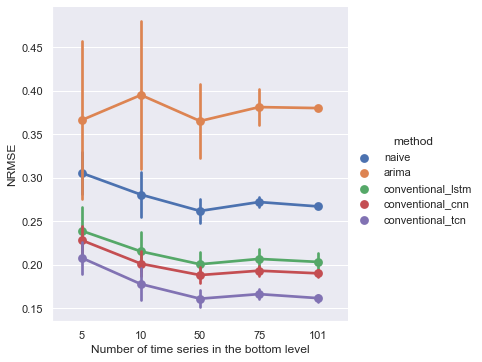

In [394]:
g = sns.catplot(data=hf_df, x='category', y='error', hue='method', kind="point", ci='sd')
g.set_xticklabels(['5', '10', '50', '75', '101'])
g.set(xlabel='Number of time series in the bottom level', ylabel='NRMSE')

In [395]:
approachA = pd.read_csv('../swis_combined_nn_results/approachA/SWIS_APPROACH_A_more_layer_without_norm/errors/final_errors.csv', index_col=0)

In [396]:
approachB = pd.read_csv('../swis_combined_nn_results/approachB/SWIS_APPROACH_B/errors/final_errors.csv', index_col=0)

In [397]:
def get_df_method(approach_df, method_name):
    runs = approach_df.values
    df = []

    for run in range(0,len(runs)):
        df.append([run, 0, 4, method_name, runs[run][0]])
        
    return pd.DataFrame(df, columns=['run', 'sample', 'category', 'method', 'error'])

In [398]:
df_A = get_df_method(approachA, 'method-A')
df_B = get_df_method(approachB, 'method-B')

In [399]:
new_hf_df = hf_df.append(df_A, ignore_index=True)
new_hf_df = new_hf_df.append(df_B, ignore_index=True)

In [400]:
# g = sns.catplot(data=new_hf_df, x='category', y='error', hue='method', kind="point", ci='sd',dodge=True, figsize=(20,70))
# g.set_xticklabels(['5', '10', '50', '75', '101'])
# g.set(xlabel='Number of time series in the bottom level', ylabel='NRMSE')
# g._legend.set_title('Method')

In [401]:
methodA_df = pd.read_csv('../swis_ts_data/hf_dataframe_errors_methodA.csv', index_col=0)

In [402]:
methodB_df = pd.read_csv('../swis_ts_data/hf_dataframe_errors_methodB.csv', index_col=0)

In [403]:
new_hf_df = new_hf_df.append(methodA_df, ignore_index=True)
new_hf_df = new_hf_df.append(methodB_df, ignore_index=True)

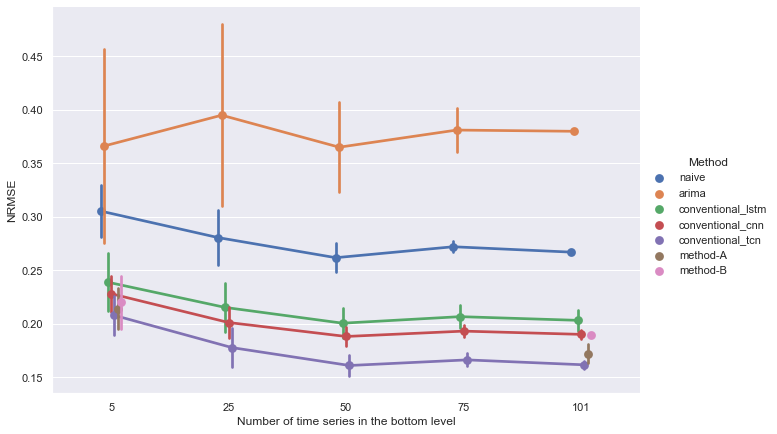

In [404]:
# sns.set(rc={'figure.figsize':(20,30)})

g = sns.catplot(data=new_hf_df, x='category', y='error', hue='method', kind="point", ci='sd',
                dodge=True, figsize=(20,70), height=6, aspect=1.5)
g.set_xticklabels(['5', '25', '50', '75', '101'])
g.set(xlabel='Number of time series in the bottom level', ylabel='NRMSE')
g._legend.set_title('Method')

In [433]:
# category_0_plot

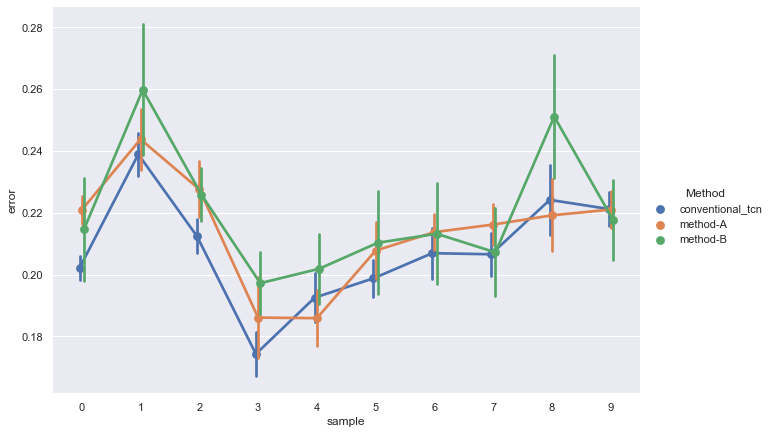

In [437]:
category_0_plot = new_hf_df.loc[new_hf_df['category'] == 0]
category_0_plot = category_0_plot.loc[category_0_plot['method'].isin(['method-A', 'method-B', 'conventional_tcn'])]

g = sns.catplot(data=category_0_plot, x='sample', y='error', hue='method', kind="point", ci='sd',
                dodge=True, figsize=(20,70), height=6, aspect=1.5)
# g.set_xticklabels(['5', '25', '50', '75', '101'])
# g.set(xlabel='Number of time series in the bottom level', ylabel='NRMSE')
g._legend.set_title('Method')

In [434]:
new_hf_df.groupby(by=['category', 'method']).median()[['error']]

error
category method                     
0        arima              0.334063
         conventional_cnn   0.226535
         conventional_lstm  0.240722
         conventional_tcn   0.206642
         method-A           0.216844
         method-B           0.214827
         naive              0.313380
1        arima              0.397021
         conventional_cnn   0.196370
         conventional_lstm  0.214172
         conventional_tcn   0.174552
         naive              0.277697
2        arima              0.377560
         conventional_cnn   0.187586
         conventional_lstm  0.199645
         conventional_tcn   0.159848
         naive              0.261812
3        arima              0.384657
         conventional_cnn   0.192081
         conventional_lstm  0.207182
         conventional_tcn   0.165746
         naive              0.272757
4        arima              0.379956
         conventional_cnn   0.188889
         conventional_lstm  0.202322
         conventional_tcn   0.160710
         method-A           0.169410
         method-B           0.189056
         naive              0.266963

In [409]:
clusters = pd.read_csv('../swis_ts_data/cluster_pc.csv').rename(columns={'Unnamed: 0': 'pc'})
clusters = clusters.loc[clusters['pc'].isin(all_pcs)]
cluster_numbers = clusters.groupby(by='cluster_num').count().index.tolist()

In [411]:
len(cluster_numbers)

20

In [412]:
clusters

,pc,cluster_num
0,6000,29
2,6005,29
3,6006,4
4,6007,4
5,6008,29
...,...,...
134,6430,3
135,6432,3
137,6509,24
139,6528,26


In [413]:
random_5_samples = [[6018, 6312, 6107, 6162, 6014],
                    [6035, 6171, 6025, 6324, 6021],
                    [6055, 6170, 6090, 6023, 6166],
                    [6150, 6050, 6232, 6237, 6041],
                    [6155, 6069, 6530, 6509, 6280],
                    [6053, 6011, 6084, 6391, 6211],
                    [6149, 6210, 6164, 6005, 6038],
                    [6063, 6173, 6073, 6062, 6036],
                    [6059, 6330, 6281, 6000, 6233],
                    [6102, 6163, 6147, 6159, 6007]]

In [422]:
cluster_samples = {}

sample = 0
for random_sample in random_5_samples:
#     print("sample", random_sample)
    cluster_samples[sample] = []
    for pc in random_sample:
        num = clusters.loc[clusters['pc'] == pc]['cluster_num'].values[0]
        cluster_samples[sample].append(num)
    sample = sample+1

In [423]:
cluster_samples

{0: [4, 17, 29, 29, 4],
 1: [0, 20, 4, 10, 4],
 2: [21, 20, 4, 4, 29],
 3: [29, 4, 18, 18, 0],
 4: [29, 21, 26, 24, 28],
 5: [4, 29, 21, 25, 14],
 6: [29, 14, 29, 29, 0],
 7: [4, 14, 21, 4, 0],
 8: [4, 10, 28, 29, 27],
 9: [29, 29, 29, 29, 4]}

In [428]:
grouped_df = new_hf_df.loc[new_hf_df['category'] == 0].groupby(by=['category', 'method', 'sample']).mean()[['error']]

In [429]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(grouped_df)

                                      error
category method            sample          
0        arima             0       0.321692
                           1       0.339068
                           2       0.289876
                           3       0.317760
                           4       0.388732
                           5       0.351667
                           6       0.329057
                           7       0.325077
                           8       0.371701
                           9       0.627529
         conventional_cnn  0       0.229616
                           1       0.244736
                           2       0.222627
                           3       0.198836
                           4       0.212025
                           5       0.221384
                           6       0.228163
                           7       0.226234
                           8       0.259479
                           9       0.237701
         conventional_lstm 0    